# Supervised Learning Regression: Effects of Advertising on Sales

## Context and Problem

- An interesting application of regression is to quantify the effect of advertisement on sales. Various channels of advertisement are newspaper, TV, radio, etc. 
- In this project, we will look at the advertising data of a company and try to observe its effect on sales.
- We will also try to predict the sales given the different parameters of advertising. 


## Data Information

The data at hand has three features about the spending on advertising and the target variable is the net sales. Attributes are:

- TV    - Independent variable quantifying budget for TV ads
- Radio - Independent variable quantifying budget for radio ads 
- News  - Independent variable quantifying budget for news ads
- Sales - Dependent variable

### Begin by importing necessary packages

In [6]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [7]:
# The following code is applicable only if you are working on Google Colab
# Import files and request user to upload the data file
from google.colab import files
uploaded = files.upload()

# In case you are using Jupyter Notebook, you can directly use pd.read_csv(filename) to load data into dataframe

Saving Advertising.csv to Advertising (1).csv


In [8]:
# Read the data into a dataframe and display the first 5 entries
Ad_df = pd.read_csv('Advertising.csv')
Ad_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
# Drop the first column since it contains the index
Ad_df.drop(columns = 'Unnamed: 0', inplace=True)
# Print the dataframe
Ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Observations:** All variables are floating point data type.

### We will begin with a simple linear regression model. We will use one feature at a time, and observe the target variable. 

In [11]:
# Store all the variables into their own numpy array
Sales = Ad_df.Sales.values.reshape(len(Ad_df['Sales']), 1)
TV = Ad_df.TV.values.reshape(len(Ad_df['Sales']), 1)
Radio = Ad_df.Radio.values.reshape(len(Ad_df['Sales']), 1)
Newspaper = Ad_df.Newspaper.values.reshape(len(Ad_df['Sales']), 1)

In [12]:
# Fit the simple linear regression model with the TV feature
tv_model = linear_model.LinearRegression()
tv_model.fit(TV, Sales)
coeffs_tv = np.array(list(tv_model.intercept_.flatten()) + list(tv_model.coef_.flatten()))
coeffs_tv = list(coeffs_tv)

# Fit the simple linear regression model with the Radio feature
radio_model = linear_model.LinearRegression()
radio_model.fit(Radio, Sales)
coeffs_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))
coeffs_radio = list(coeffs_radio)

# Fit the simple linear regression model with the Newspaper feature
newspaper_model = linear_model.LinearRegression()
newspaper_model.fit(Newspaper, Sales)
coeffs_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))
coeffs_newspaper = list(coeffs_newspaper)

# Wrap the results above in a dictionary
dict_Sales = {}
dict_Sales["TV"] = coeffs_tv
dict_Sales["Radio"] = coeffs_radio
dict_Sales["Newspaper"] = coeffs_newspaper

# Display the dictionary using a dataframe
metric_Df_SLR = pd.DataFrame(dict_Sales)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [13]:
# Calculate the R^2 value for each of the independent variables
tv_rsq = tv_model.score(TV, Sales)
radio_rsq = radio_model.score(Radio, Sales)
newspaper_rsq = newspaper_model.score(Newspaper, Sales)

# Display the R^2 results
print("TV simple linear regression R-Square :", tv_rsq)
print("Radio simple linear regression R-Square :", radio_rsq)
print("Newspaper simple linear regression R-Square :", newspaper_rsq)

# Store the R^2 values into a list
list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]
list_rsq

TV simple linear regression R-Square : 0.611875050850071
Radio simple linear regression R-Square : 0.33203245544529525
Newspaper simple linear regression R-Square : 0.05212044544430516


[0.611875050850071, 0.33203245544529525, 0.05212044544430516]

In [14]:
# Store the list of R^2 values into our dataframe
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120


**Observations:** We can see that TV has the highest R^2 value (**61%**) followed by Radio and then Newspaper.

Let's try to visualize the line or best fit using a regression plot.

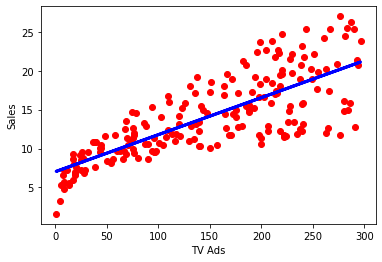

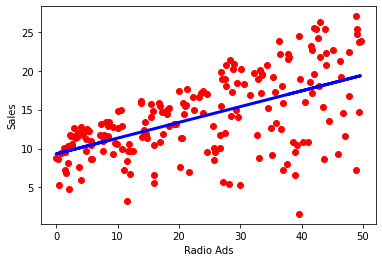

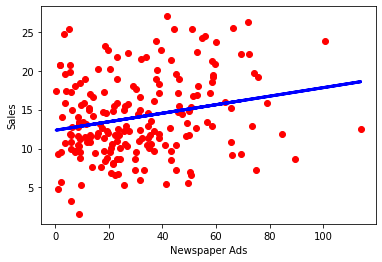

In [15]:
# Create a regression plot for TV ads vs sales
plt.scatter(TV, Sales,  color='red')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(TV, tv_model.predict(TV), color='blue', linewidth=3)
plt.show()

# Create a regression plot for Radio Ads vs sales
plt.scatter(Radio, Sales,  color='red')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')
plt.plot(Radio, radio_model.predict(Radio), color='blue', linewidth=3)
plt.show()

# Create a regression plot for Newspaper ads vs sales
plt.scatter(Newspaper, Sales,  color='red')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')
plt.plot(Newspaper, newspaper_model.predict(Newspaper), color='blue', linewidth=3)
plt.show()


## Multiple Linear Regression

Now that we have built and tested a simple linear regression model, we will now build a multiple linear regression model.

In [16]:
# Initialize a multiple linear regression model
mlr_model = linear_model.LinearRegression()
# Fit the model to the original dataframe
mlr_model.fit(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Predict sales using the 3 independent variable columns
Ad_df['Sales_Predicted'] = mlr_model.predict(Ad_df[['TV', 'Radio', 'Newspaper']])
# Calculate the mean squared error between the predicted sales and actual sales
Ad_df['Error'] = (Ad_df['Sales_Predicted'] - Ad_df['Sales'])**2
MSE_MLR = Ad_df['Error'].mean()

In [18]:
# Print the MSE
MSE_MLR

2.784126314510936

In [20]:
# Print the R^2 value
mlr_model.score(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

0.8972106381789521

**Observations:** The R^2 value for the multiple linear regression comes out to be ~89.7%, much better than what was achieved using simple linear regression.

Now let's try to use **statsmodels** to get a more detailed model interpretation.

In [24]:
# Obtain a more detailed model using the statsmodels library
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper', data = Ad_df).fit()
lm1.params
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        01:17:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print("*************Parameters**************")
print(lm1.params)
print("*************P-Values**************")
print(lm1.pvalues)
print("************Standard Errors***************")
print(lm1.bse) 
print("*************Confidence Interval**************")
print(lm1.conf_int())
print("*************Error Covariance Matrix**************")
print(lm1.cov_params())


*************Parameters**************
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
*************P-Values**************
Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
************Standard Errors***************
Intercept    0.311908
TV           0.001395
Radio        0.008611
Newspaper    0.005871
dtype: float64
*************Confidence Interval**************
                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541
*************Error Covariance Matrix**************
           Intercept            TV         Radio     Newspaper
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV         -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper  -0.000591 -3.265950e-07 -1.780062e-05  3.446875

### Visualizing the confidence bands in Simple linear regression

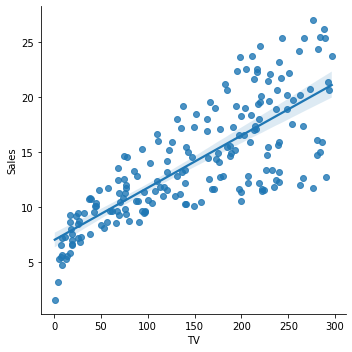

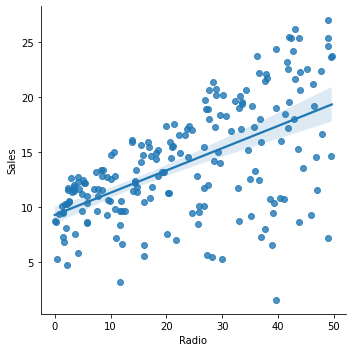

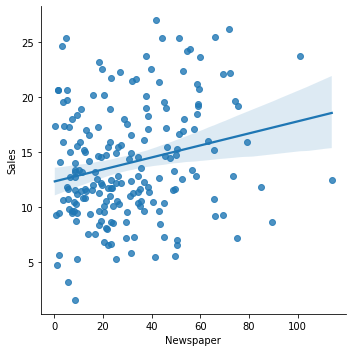

In [26]:
# Import seaborn for visualization tools
import seaborn as sns
# Plot the linear regression for TV ads vs Sales with confidence bands
sns.lmplot(x='TV', y='Sales', data=Ad_df)
# Plot the linear regression for Radio ads vs Sales with confidence bands
sns.lmplot(x='Radio', y='Sales', data=Ad_df )
# Plot the linear regression for Newspaper ads vs Sales with confidence bands
sns.lmplot(x='Newspaper', y='Sales', data=Ad_df)

# Model Evaluation: Cross-validation and Bootstrapping Methods

We can see that the newspaper ads can likely be omitted from the list of significant features, owing to its p-value. We can now run regression analysis adding a multiplicative feature within it.

In [27]:
Ad_df['TVandRadio'] = Ad_df['TV']*Ad_df['Radio']

In [28]:
# Remove the 'Sales_Predicted' and the 'Error' columns added in the previous sections
Ad_df.drop(columns = ["Error", "Sales_Predicted"], inplace = True)

In [30]:
# Perform detailed modeling with the statsmodels library, including the new 'TVandRadio' feature
lm2 = smf.ols(formula='Sales ~ TV+Radio+Newspaper+TVandRadio', data=Ad_df).fit()
lm2.params
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          2.92e-144
Time:                        01:27:27   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7284      0.253     26.561      0.000       6.229       7.228
TV             0.0191      0.002     12.633      0.000       0.016       0.022
Radio          0.0280      0.009      3.062      0.003       0.010       0.046
Newspaper      0.0014      0.003      0.438      0.662      -0.005       0.008
TVandRadio     0.0011   5.26e-05     20.686      0.000       0.001       0.001
==============================================================================
Omnibus:                      126.161   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.463
Skew:                          -2.291   Prob(JB):                    1.10e-244
Kurtosis:                      13.669   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations**
- We see an increase in the R-squared value here. 
- However, what is yet to be seen is if this model useful for prediction. Does it perform well when predicting unseen data?

## Performance assessment, testing and validation

### Train, Test, and Validation set
We will split data into three sets:
1. One to **train** the model
2. One to **validate** the model performance for values not seen during training and make improvements
3. One to **test** the model

In [31]:
# Import libraries from sklearn to train and test the model
from sklearn.model_selection import train_test_split

In [33]:
features_base = [i for i in Ad_df.columns if i not in ("Sales" , "TVandRadio")]
features_added = [i for i in Ad_df.columns if i not in "Sales"]
target  = 'Sales'
# Obtain the training and testing data sets from the dataframe
train, test = train_test_split(Ad_df, test_size = 0.10, train_size = 0.9)

In [34]:
# Obtain the training and validation subsets of the training data
train, validation = train_test_split(train, test_size = 0.2, train_size = 0.80)

In [35]:
# Observe the shape of the training, validation, and testing data
train.shape, validation.shape, test.shape

((144, 5), (36, 5), (20, 5))

In [36]:
# Begin modeling using Linear Regression
from sklearn.linear_model import LinearRegression

# Initialize the regression model
mlr = LinearRegression()
# Fit the model using the base features and target variable
mlr.fit(train[features_base], train[target])
# Obtain and display the R^2 and MSE for both the training and validation sets
print("*********Training set Metrics**************")
print("R-Squared:", mlr.score(train[features_base], train[target]))
se_train = (train[target] - mlr.predict(train[features_base]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr.score(validation[features_base], validation[target]))
se_val = (validation[target] - mlr.predict(validation[features_base]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9035763387197941
MSE:  2.8067140315286534
********Validation set Metrics**************
R-Squared: 0.8391421793418498
MSE:  3.0050872215144566


**Can we increase the model performance by adding the new feature?** This was the case in the previous analysis, however let's verify this against the validation set.

In [37]:
# Initialize the model with added features
mlr_added_feature = LinearRegression()
# Train the model using the original and added features alongside the target variable
mlr_added_feature.fit(train[features_added], train[target])
# Obtain the R^2 metric as well as the MSE for the training and validation sets
print("*********Training set Metrics**************")
print("R-Squared:", mlr_added_feature.score(train[features_added], train[target]))
se_train = (train[target] - mlr_added_feature.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr_added_feature.score(validation[features_added], validation[target]))
se_val = (validation[target] - mlr_added_feature.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.970131415594928
MSE:  0.8694191222214341
********Validation set Metrics**************
R-Squared: 0.9663997065759058
MSE:  0.6277084446050276


**Observations**
- We can see in the output above that the R-squared has increased after adding a feature, which should be expected.
- The error has also decreased.

**Now we will fit a regularized model.**

## Regularization 

We will now regularize our model using both Ridge and Lasso models.

In [38]:
# Display the features, including the added features
features_added

['TV', 'Radio', 'Newspaper', 'TVandRadio']

In [44]:
from sklearn.linear_model import Ridge

# Fit a Ridge model with the default features
ridge = Ridge()
ridge.fit(train[features_added], train[target])
# Obtain the R^2 and MSE metrics for the Ridge model prediction on the training and validation sets
print("*********Training set Metrics**************")
print("R-Squared:", ridge.score(train[features_added], train[target]))
se_train = (train[target] - ridge.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", ridge.score(validation[features_added], validation[target]))
se_val = (validation[target] - ridge.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9701314155546668
MSE:  0.8694191233933648
********Validation set Metrics**************
R-Squared: 0.9664006221298456
MSE:  0.6276913405597633


In [45]:
from sklearn.linear_model import Lasso

# Fit a Lasso model with the default features
lasso = Lasso()
lasso.fit(train[features_added], train[target])
# Obtain R^2 and MSE metrics for the Lasso model prediction on the training and validation sets
print("*********Training set Metrics**************")
print("R-Squared:", lasso.score(train[features_added], train[target]))
se_train = (train[target] - lasso.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", lasso.score(validation[features_added], validation[target]))
se_val = (validation[target] - lasso.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9693561799740387
MSE:  0.8919847940285633
********Validation set Metrics**************
R-Squared: 0.9690587912985489
MSE:  0.5780323922486991


In [46]:
# Run a prediction and evaluate metrics on the testing data using the Ridge model
rsq_test = ridge.score(test[features_added], test[target])
se_test = (test[target] - ridge.predict(test[features_added]))**2
mse_test = se_test.mean()

print("*****************Test set Metrics******************")
print("Rsquared: ", rsq_test)
print("MSE: ", mse_test)
print("Intercept is {} and Coefficients are {}".format(ridge.intercept_, ridge.coef_))

*****************Test set Metrics******************
Rsquared:  0.9406461987862091
MSE:  1.3904978233308116
Intercept is 6.6822787556236705 and Coefficients are [ 0.01902388  0.03434089 -0.00052342  0.00106803]


We can now evaluate the performance of our models using the LooCV and KFold methods.

### K-Fold and LooCV

In [47]:
# Import a cross-validation library from sklearn
from sklearn.model_selection import cross_val_score

In [48]:
# Create a ridge model for cross-validation
ridgeCV = Ridge()
# Obtain a cross-validation score on the Ridge model and calculate the error metrics
cvs = cross_val_score(ridgeCV, Ad_df[features_added], Ad_df[target], cv = 10)
print("Mean Score:")
print(cvs.mean(), "\n")
print("Confidence Interval:")
cvs.mean() - cvs.std(), cvs.mean() + cvs.std() 

Mean Score:
0.9649887636257694 

Confidence Interval:


(0.9430473456799697, 0.986930181571569)

Note that the same can be set as LooCV if 'cv' parameter is set to **n**, which is 200 in this case.

## Alternative Methods for using the statsmodels library to fit regularized model

We can also use the **statsmodels** library to regularize using the code below.

In [58]:
# Alternative method for fitting the Lasso model
lm3 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit_regularized(method = 'elastic_net', L1_wt = 1)
print("*************Parameters**************")
print(lm3.params)

# Alternative method for fitting the Ridge model
lm4 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit_regularized(method = 'elastic_net', L1_wt = 0)
print("\n*************Parameters**************")
print(lm4.params)

*************Parameters**************
Intercept     6.471607
TV            0.020325
Radio         0.036049
Newspaper     0.002202
TVandRadio    0.001044
dtype: float64

*************Parameters**************
[6.72841195e+00 1.90668162e-02 2.79916606e-02 1.44424442e-03
 1.08733333e-03]


## Bootstrapping

In this section, we experiment with Bootstrapping methods.  We begin by once again obtaining a detailed model using the **statsmodels** library.

In [50]:
# Obtain a more detailed model using the statsmodels library
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ TV', data = Ad_df).fit()
lm2.params
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        01:55:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we can calculate the slope 1000 times using bootstrapping. The bootstrap method is a resampling technique that can be used to estimate statistics by sampling our dataset with replacement.

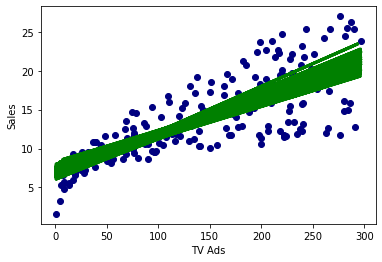

In [51]:
# Calculate the slopes a 1000 times using bootstrapping
Slope = []
for i in range(1000):
  bootstrap_df = Ad_df.sample(n = 200, replace = True )
  lm3 = smf.ols(formula= 'Sales ~ TV', data = bootstrap_df).fit()
  Slope.append(lm3.params.TV)
  
  plt.xlabel('TV Ads')
  plt.ylabel('Sales')
  plt.plot(bootstrap_df['TV'], lm3.predict(bootstrap_df['TV']), color='green', linewidth=3)
  
plt.scatter(Ad_df['TV'], Ad_df['Sales'],  color=(0,0,0.5))
plt.show()


Now let's obtain the 2.5 and 97.5 percentiles for the slopes obtained via bootstrapping.

In [52]:
# Obtain the 2.5 and 97.5 percentiles for the slopes calculated above
# Put the slopes into a numpy array
Slope = np.array(Slope)
# Sort the slopes
Sort_Slope = np.sort(Slope)
# Obtain the percentiles and display them
Slope_limits = np.percentile(Sort_Slope, (2.5, 97.5))
Slope_limits

array([0.04178418, 0.05326877])

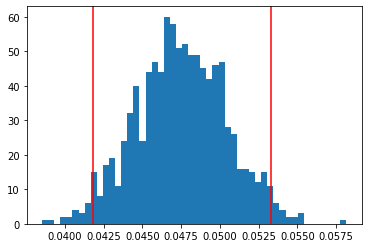

In [54]:
# Plot the slopes as well as markers for the upper and the lower percentile limits
plt.hist(Slope, 50)
plt.axvline(Slope_limits[0], color = 'r')
plt.axvline(Slope_limits[1], color = 'r')